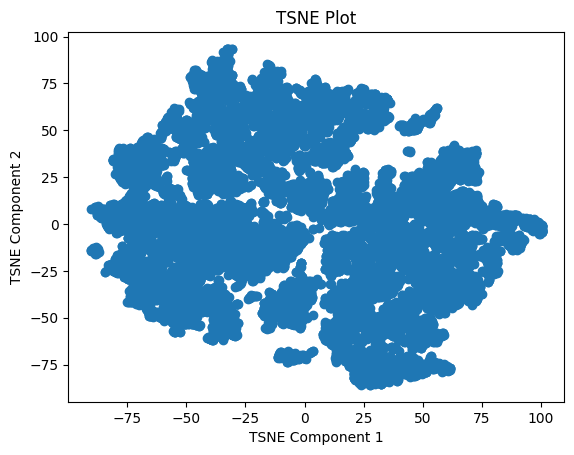

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# DEPRECATED: load_boston is deprecated in 1.0 and will be removed in 1.2. (https://scikit-learn.org/1.0/modules/generated/sklearn.datasets.load_boston.html)
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.xlabel("TSNE Component 1")
plt.ylabel("TSNE Component 2")
plt.title("TSNE Plot")
plt.show()

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами. 
Вычислите средние значения price и CRIM в разных кластерах.

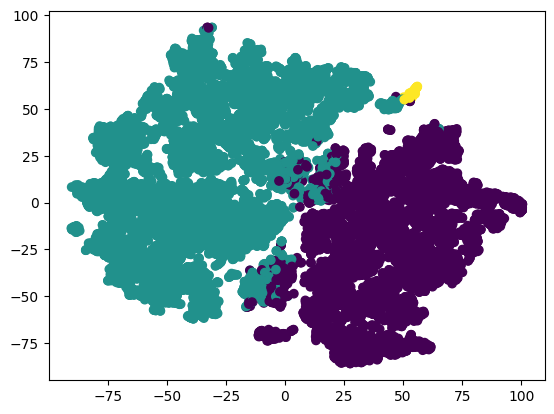

Средние значения price:
Кластер 0: 1.9799682687040507
Кластер 1: 2.1421371125131445
Кластер 2: 1.6188309230769231
Средние значения CRIM:
Кластер 0: 1299.2149344096872
Кластер 1: 1526.8522607781283
Кластер 2: 316.5076923076923


In [76]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42, n_init=10)
labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

print('Средние значения price:')
print('Кластер 0: {}'.format(y_train[labels_train == 0].mean()))
print('Кластер 1: {}'.format(y_train[labels_train == 1].mean()))
print('Кластер 2: {}'.format(y_train[labels_train == 2].mean()))

print('Средние значения CRIM:')
print('Кластер 0: {}'.format(X_train.loc[labels_train == 0, 'Population'].mean()))
print('Кластер 1: {}'.format(X_train.loc[labels_train == 1, 'Population'].mean()))
print('Кластер 2: {}'.format(X_train.loc[labels_train == 2, 'Population'].mean()))

In [77]:
labels_test = kmeans.predict(X_test_scaled)

print('Средние значения price:')
print('Кластер 0: {}'.format(y_test[labels_test == 0].mean()))
print('Кластер 1: {}'.format(y_test[labels_test == 1].mean()))
print('Кластер 2: {}'.format(y_test[labels_test == 2].mean()))

print('Средние значения CRIM:')

print('Кластер 0: {}'.format(X_test.loc[labels_test == 0, 'Population'].mean()))
print('Кластер 1: {}'.format(X_test.loc[labels_test == 1, 'Population'].mean()))
print('Кластер 2: {}'.format(X_test.loc[labels_test == 2, 'Population'].mean()))

Средние значения price:
Кластер 0: 1.9495189651094025
Кластер 1: 2.1314241164327004
Кластер 2: 1.6071333333333333
Средние значения CRIM:
Кластер 0: 1248.649319929036
Кластер 1: 1548.82617671346
Кластер 2: 368.3333333333333
